In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
df.TotalCharges = df.TotalCharges.replace(' ', np.nan)
df.TotalCharges = df.TotalCharges.astype(float)
df.Churn = df.Churn.apply(lambda x: 1 if x.lower() == 'yes' else 0)

Text(0.5, 1.0, 'Distribution of Tenure')

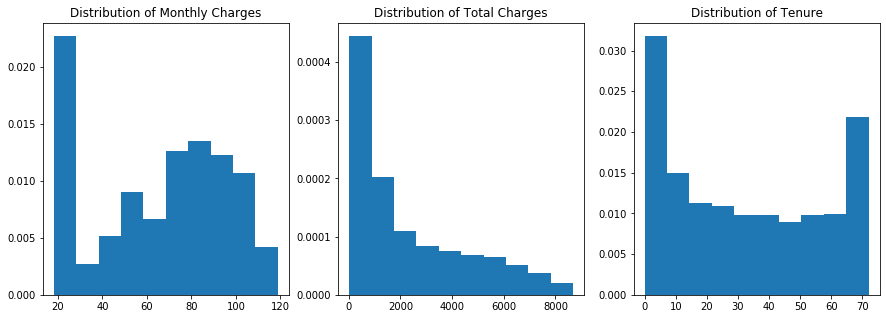

In [5]:
(fig, axes) = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df.MonthlyCharges, density=True)
axes[0].set_title('Distribution of Monthly Charges')

axes[1].hist(df.TotalCharges[~df.TotalCharges.isna()], density=True)
axes[1].set_title('Distribution of Total Charges')

axes[2].hist(df.tenure, density=True)
axes[2].set_title('Distribution of Tenure')

Text(0.5, 1.0, 'Distribution of Churn')

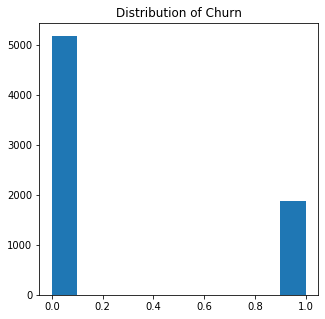

In [6]:
(fig, ax) = plt.subplots(1, 1, figsize=(5, 5))
ax.hist(df.Churn)
ax.set_title('Distribution of Churn')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
(train_df, test_df) = train_test_split(df, test_size=0.3, random_state=1)

In [9]:
def df_to_features_and_labels(df):
    y = df.Churn
    X = df.drop(columns=['customerID', 'Churn'])
    return (X, y)

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [11]:
def build_model_pipeline(model):
    other_columns = ['customerID', 'Churn']

    continuous_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
    continuous_features_processor = make_pipeline(
        SimpleImputer(strategy='mean'),
    )

    categorical_features = [c for c in df.columns if c not in continuous_features + other_columns]
    categorical_features_processor = OneHotEncoder()

    return make_pipeline(
        make_column_transformer(
            (categorical_features_processor, categorical_features),
            (continuous_features_processor, continuous_features)
        ),
        model
    )

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors.nearest_centroid import NearestCentroid

In [13]:
(X, y) = df_to_features_and_labels(train_df)

In [14]:
def report_best_model(gscv):
    results = gscv.cv_results_
    best_index = results['rank_test_score'][0] - 1
    score = round(results["mean_test_score"][best_index], 4)
    std = round(results["std_test_score"][best_index], 4)
    print(f'Score {score} +/- {std}')
    print(f' Params: {results["params"][best_index]}')

In [15]:
# logistic regression cv
pipeline = build_model_pipeline(
    LogisticRegression(solver='lbfgs', max_iter=500)
)
gscv = GridSearchCV(
    pipeline,
    {'logisticregression__C': np.arange(0.1, 1.1, 0.1)},
    scoring='f1',
    cv=10
)
gscv.fit(X, y)
report_best_model(gscv)

Score 0.594 +/- 0.031
 Params: {'logisticregression__C': 0.8}


In [18]:
# linear svc cv
pipeline = build_model_pipeline(
    LinearSVC(max_iter=500)
)
gscv = GridSearchCV(
    pipeline,
    {'linearsvc__C': np.arange(0.1, 1.1, 0.1)},
    scoring='f1',
    cv=10
)
gscv.fit(X, y)
report_best_model(gscv)

/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ju

/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ju

/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ju

/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Score 0.4428 +/- 0.1695
 Params: {'linearsvc__C': 0.8}


/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
# nearest centroid
pipeline = build_model_pipeline(
    NearestCentroid()
)
gscv = GridSearchCV(
    pipeline,
    {},
    scoring='f1',
    cv=10
)
gscv.fit(X, y)
report_best_model(gscv)

Score 0.4469 +/- 0.0209
 Params: {}


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
def build_model_pipeline(model):
    other_columns = ['customerID', 'Churn']

    continuous_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
    continuous_features_processor = make_pipeline(
        SimpleImputer(strategy='mean'),
        StandardScaler()
    )

    categorical_features = [c for c in df.columns if c not in continuous_features + other_columns]
    categorical_features_processor = OneHotEncoder()

    return make_pipeline(
        make_column_transformer(
            (categorical_features_processor, categorical_features),
            (continuous_features_processor, continuous_features)
        ),
        model
    )

In [63]:
def plot_model_performance(results, param_key, param_name):
    (fig, ax) = plt.subplots(1, 1, figsize=(8, 5))

    ax.plot(results[param_key].data, results['mean_test_score'])
    high = results['mean_test_score'] + results['std_test_score']
    low = results['mean_test_score'] - results['std_test_score']
    ax.fill_between(results[param_key].data.astype(float), high, low, alpha=0.5)
    ax.set_ylim(0, 1)
    ax.set_ylabel('mean score')
    ax.set_xlabel(param_name)
    ax.set_title('Model performance on test set as function of ' + param_name)

Score 0.6006 +/- 0.0301
 Params: {'logisticregression__C': 1.0}


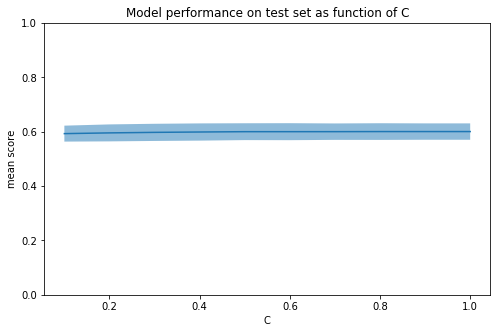

In [64]:
# logistic regression cv
pipeline = build_model_pipeline(
    LogisticRegression(solver='lbfgs', max_iter=500)
)
gscv = GridSearchCV(
    pipeline,
    {'logisticregression__C': np.arange(0.1, 1.1, 0.1)},
    scoring='f1',
    cv=10
)
gscv.fit(X, y)
report_best_model(gscv)
plot_model_performance(gscv.cv_results_, 'param_logisticregression__C', 'C')

Score 0.5892 +/- 0.0176
 Params: {'linearsvc__C': 1.0}


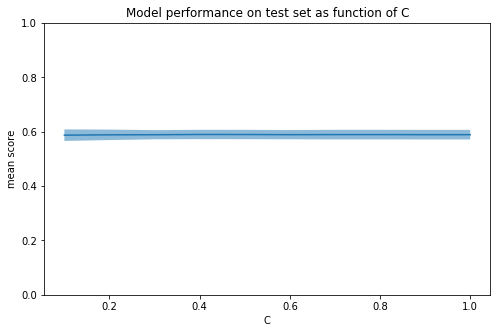

In [65]:
# linear svc cv
pipeline = build_model_pipeline(
    LinearSVC(max_iter=1500)
)
gscv = GridSearchCV(
    pipeline,
    {'linearsvc__C': np.arange(0.1, 1.1, 0.1)},
    scoring='f1',
    cv=10
)
gscv.fit(X, y)
report_best_model(gscv)
plot_model_performance(gscv.cv_results_, 'param_linearsvc__C', 'C')

In [27]:
# nearest centroid
pipeline = build_model_pipeline(
    NearestCentroid()
)
gscv = GridSearchCV(
    pipeline,
    {},
    scoring='f1',
    cv=10
)
gscv.fit(X, y)
report_best_model(gscv)

Score 0.6112 +/- 0.0248
 Params: {}


In [66]:
from sklearn.model_selection import KFold

Score 0.5977 +/- 0.0252
 Params: {'logisticregression__C': 1.0}


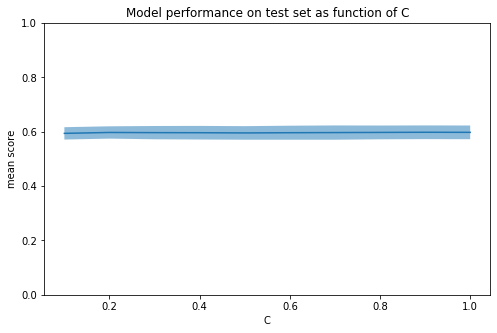

In [68]:
# logistic regression cv
pipeline = build_model_pipeline(
    LogisticRegression(solver='lbfgs', max_iter=500)
)
gscv = GridSearchCV(
    pipeline,
    {'logisticregression__C': np.arange(0.1, 1.1, 0.1)},
    scoring='f1',
    cv=KFold(n_splits=10, shuffle=True, random_state=5)
)
gscv.fit(X, y)
report_best_model(gscv)
plot_model_performance(gscv.cv_results_, 'param_logisticregression__C', 'C')

Score 0.601 +/- 0.0261
 Params: {'logisticregression__C': 1.0}


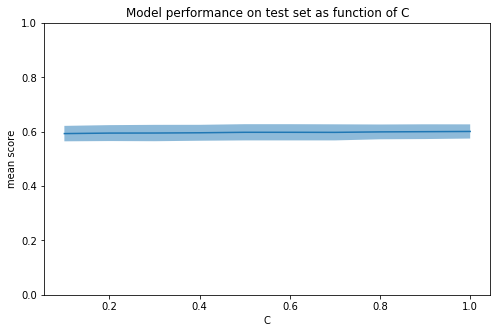

In [69]:
# logistic regression cv
pipeline = build_model_pipeline(
    LogisticRegression(solver='lbfgs', max_iter=500)
)
gscv = GridSearchCV(
    pipeline,
    {'logisticregression__C': np.arange(0.1, 1.1, 0.1)},
    scoring='f1',
    cv=KFold(n_splits=10, shuffle=False, random_state=5)
)
gscv.fit(X, y)
report_best_model(gscv)
plot_model_performance(gscv.cv_results_, 'param_logisticregression__C', 'C')

Score 0.5999 +/- 0.0494
 Params: {'logisticregression__C': 1.0}


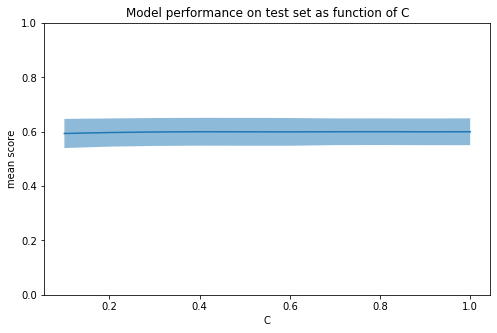

In [89]:
# logistic regression cv
pipeline = build_model_pipeline(
    LogisticRegression(solver='lbfgs', max_iter=500)
)
gscv = GridSearchCV(
    pipeline,
    {'logisticregression__C': np.arange(0.1, 1.1, 0.1)},
    scoring='f1',
    cv=KFold(n_splits=10, shuffle=True, random_state=7)
)
gscv.fit(X, y)
report_best_model(gscv)
plot_model_performance(gscv.cv_results_, 'param_logisticregression__C', 'C')

Text(0.5, 0, 'Feature')

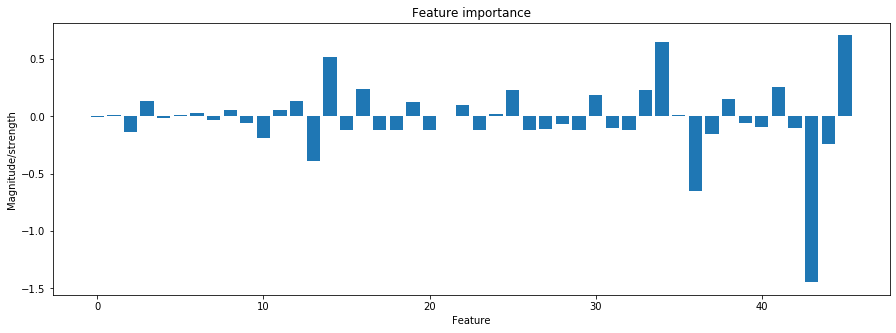

In [90]:
(fig, ax) = plt.subplots(1, 1, figsize=(15, 5))
model = gscv.best_estimator_.named_steps['logisticregression']
features = list(range(model.coef_.shape[1]))
ax.bar(features, model.coef_[0, :])
ax.set_title('Feature importance')
ax.set_ylabel('Magnitude/strength')
ax.set_xlabel('Feature')

Score 0.59 +/- 0.0234
 Params: {'linearsvc__C': 0.30000000000000004}


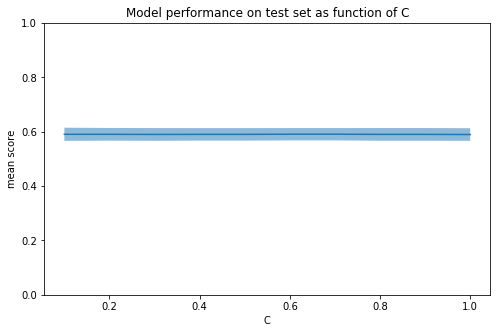

In [71]:
# linear svc cv
pipeline = build_model_pipeline(
    LinearSVC(max_iter=1500)
)
gscv = GridSearchCV(
    pipeline,
    {'linearsvc__C': np.arange(0.1, 1.1, 0.1)},
    scoring='f1',
    cv=KFold(n_splits=10, shuffle=True, random_state=5)
)
gscv.fit(X, y)
report_best_model(gscv)
plot_model_performance(gscv.cv_results_, 'param_linearsvc__C', 'C')

Score 0.5879 +/- 0.0157
 Params: {'linearsvc__C': 1.0}


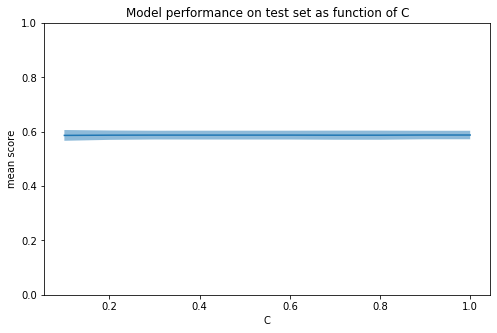

In [73]:
# linear svc cv
pipeline = build_model_pipeline(
    LinearSVC(max_iter=1500)
)
gscv = GridSearchCV(
    pipeline,
    {'linearsvc__C': np.arange(0.1, 1.1, 0.1)},
    scoring='f1',
    cv=KFold(n_splits=10, shuffle=False, random_state=5)
)
gscv.fit(X, y)
report_best_model(gscv)
plot_model_performance(gscv.cv_results_, 'param_linearsvc__C', 'C')

Score 0.5887 +/- 0.0497
 Params: {'linearsvc__C': 0.6}


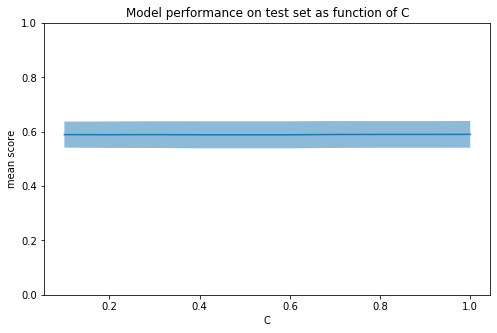

In [74]:
# linear svc cv
pipeline = build_model_pipeline(
    LinearSVC(max_iter=1500)
)
gscv = GridSearchCV(
    pipeline,
    {'linearsvc__C': np.arange(0.1, 1.1, 0.1)},
    scoring='f1',
    cv=KFold(n_splits=10, shuffle=True, random_state=7)
)
gscv.fit(X, y)
report_best_model(gscv)
plot_model_performance(gscv.cv_results_, 'param_linearsvc__C', 'C')

In [77]:
gscv.best_estimator_.named_steps

{'columntransformer': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('onehotencoder',
                                  OneHotEncoder(categorical_features=None,
                                                categories=None, drop=None,
                                                dtype=<class 'numpy.float64'>,
                                                handle_unknown='error',
                                                n_values=None, sparse=True),
                                  ['gender', 'SeniorCitizen', 'Partner',
                                   'Dependents', 'PhoneService', 'MultipleLines',
                                   '...
                                   'PaperlessBilling', 'PaymentMethod']),
                                 ('pipeline',
                                  Pipeline(memory=None,
                                           steps=[('simpleimp

Text(0.5, 0, 'Feature')

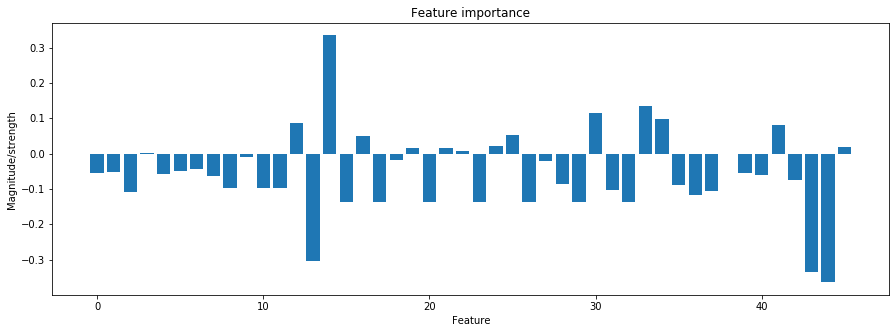

In [87]:
(fig, ax) = plt.subplots(1, 1, figsize=(15, 5))
model = gscv.best_estimator_.named_steps['linearsvc']
features = list(range(model.coef_.shape[1]))
ax.bar(features, model.coef_[0, :])
ax.set_title('Feature importance')
ax.set_ylabel('Magnitude/strength')
ax.set_xlabel('Feature')